# Import Packages

In [2]:
# Import necessary libraries
import os
import numpy as np

import pandas as pd
from PIL import Image as img
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, classification_report
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from IPython.display import Image  

from scipy.io import loadmat
from scipy import stats
from scipy.io import arff

import time

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# Functions

In [3]:
def iso_run(classifier, X_train, y_train, X_test):
    
    iso = Isomap(n_components=49)
    
    X_train_iso = iso.fit_transform(X_train)
    classifier.fit(X_train_iso, y_train)


    X_test_iso = iso.transform(X_test)


    prediction = classifier.predict(X_test_iso)
    return classifier, X_test_iso, prediction

In [4]:
def pca_run(classifier, X_train, y_train, X_test):
    
    pca = PCA(n_components=49,random_state=42)
    
    X_train_pca = pca.fit_transform(X_train)
    classifier.fit(X_train_pca, y_train)


    X_test_pca = pca.transform(X_test)


    prediction = classifier.predict(X_test_pca)
    return classifier, X_test_pca, prediction

In [5]:
def result(X_test, y_test, prediction, classifier):
    clf = classifier
    
    sns.set()
    %matplotlib inline
    
    roc_auc = roc_auc_score(y_test, prediction)
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label = str(classifier)+' (area = %0.3f)' % roc_auc)
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc= 'lower right')
    plt.show()
    
    
    accuracy = accuracy_score(y_test, prediction)
    fpr, tpr, thresholds = roc_curve(y_test, prediction, pos_label=1)
    tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).ravel()
    specificity = tn/(tn+fp)

    print('True Positives:', tp)
    print('True Negatives:', tn)
    print('False Positives:', fp)
    print('False Negatives:', fn)

    print(classification_report(y_test, prediction))
    print('Specificity {:0.2}'.format(specificity))
    print('Accuracy: %.3f%%' %(accuracy * 100.0))
    print('AUC: ', auc(fpr, tpr))
    
    return

# Preprocessing

In [6]:
BASE_PATH = '../'
MAT_FILE = 'data/combined_data_mtx.mat'

combined_data_mtx = loadmat(BASE_PATH + MAT_FILE)

y = combined_data_mtx['bool_label'].ravel() #real = 1 fake = 0
X = combined_data_mtx['img_array']

#combined_data_mtx['difficulty']
#combined_data_mtx['label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ISOMAP

In [8]:
lr, X_test_iso, predictionlr = iso_run(LogisticRegression(random_state=42), X_train, y_train, X_test)

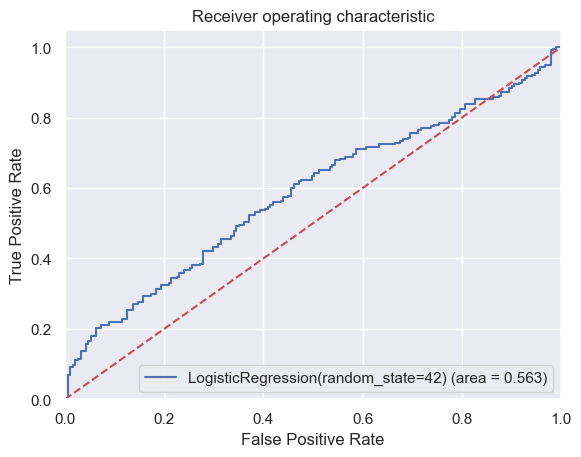

True Positives: 145
True Negatives: 88
False Positives: 103
False Negatives: 73
              precision    recall  f1-score   support

           0       0.55      0.46      0.50       191
           1       0.58      0.67      0.62       218

    accuracy                           0.57       409
   macro avg       0.57      0.56      0.56       409
weighted avg       0.57      0.57      0.57       409

Specificity 0.46
Accuracy: 56.968%
AUC:  0.5629352994860464


In [9]:
result(X_test_iso, y_test, predictionlr, lr)

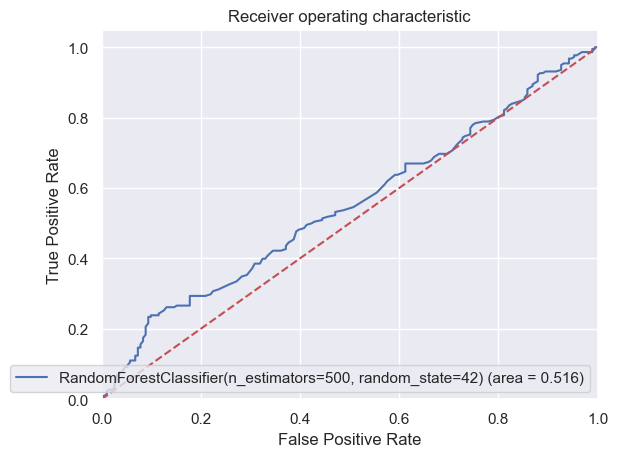

True Positives: 128
True Negatives: 85
False Positives: 106
False Negatives: 90
              precision    recall  f1-score   support

           0       0.49      0.45      0.46       191
           1       0.55      0.59      0.57       218

    accuracy                           0.52       409
   macro avg       0.52      0.52      0.52       409
weighted avg       0.52      0.52      0.52       409

Specificity 0.45
Accuracy: 52.078%
AUC:  0.5160910706566118


In [10]:
rf, X_test_iso, predictionrf = iso_run(RandomForestClassifier(n_estimators = 500,random_state=42), X_train, y_train, X_test)
result(X_test_iso, y_test, predictionrf, rf)

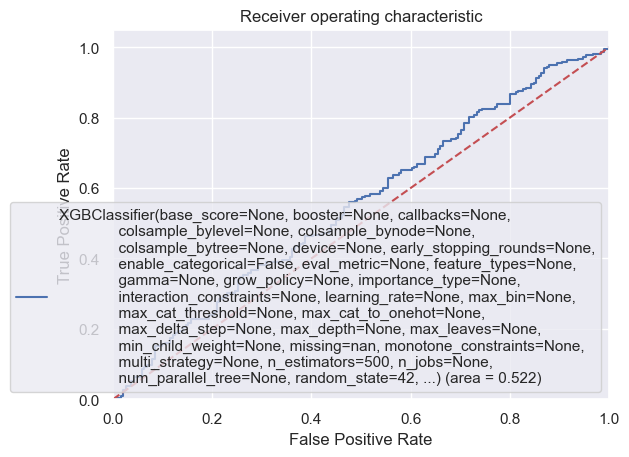

True Positives: 127
True Negatives: 88
False Positives: 103
False Negatives: 91
              precision    recall  f1-score   support

           0       0.49      0.46      0.48       191
           1       0.55      0.58      0.57       218

    accuracy                           0.53       409
   macro avg       0.52      0.52      0.52       409
weighted avg       0.52      0.53      0.52       409

Specificity 0.46
Accuracy: 52.567%
AUC:  0.5216508958163216


In [11]:
xgb, X_test_iso, predictionxgb = iso_run(XGBClassifier(n_estimators = 500,random_state=42), X_train, y_train, X_test)
result(X_test_iso, y_test, predictionxgb, xgb)

# PCA

In [12]:
lr, X_test_pca, predictionlr = pca_run(LogisticRegression(random_state=42), X_train, y_train, X_test)

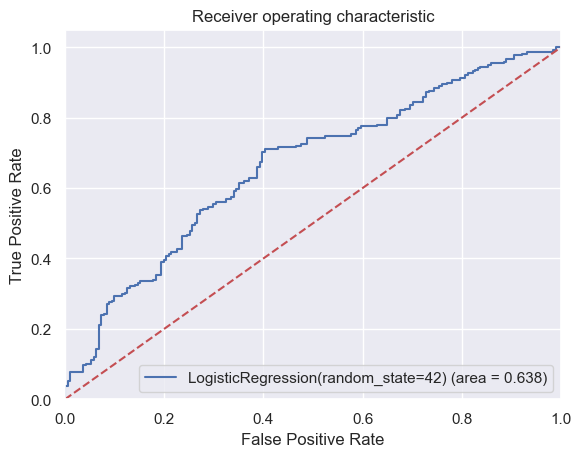

True Positives: 156
True Negatives: 107
False Positives: 84
False Negatives: 62
              precision    recall  f1-score   support

           0       0.63      0.56      0.59       191
           1       0.65      0.72      0.68       218

    accuracy                           0.64       409
   macro avg       0.64      0.64      0.64       409
weighted avg       0.64      0.64      0.64       409

Specificity 0.56
Accuracy: 64.303%
AUC:  0.6379028771794996


In [13]:
result(X_test_pca, y_test, predictionlr, lr)

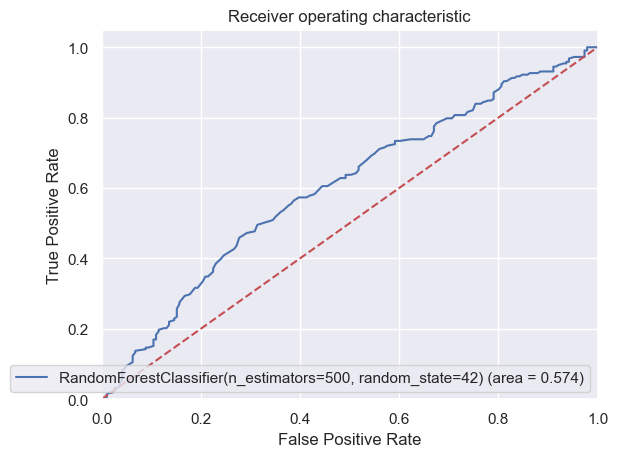

True Positives: 151
True Negatives: 87
False Positives: 104
False Negatives: 67
              precision    recall  f1-score   support

           0       0.56      0.46      0.50       191
           1       0.59      0.69      0.64       218

    accuracy                           0.58       409
   macro avg       0.58      0.57      0.57       409
weighted avg       0.58      0.58      0.58       409

Specificity 0.46
Accuracy: 58.191%
AUC:  0.5740789663288342


In [15]:
rf, X_test_pca, predictionrf = pca_run(RandomForestClassifier(n_estimators = 500,random_state=42), X_train, y_train, X_test)
result(X_test_pca, y_test, predictionrf, rf)

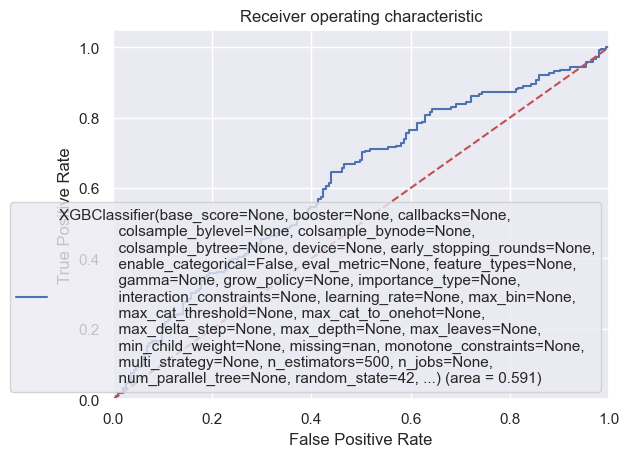

True Positives: 147
True Negatives: 97
False Positives: 94
False Negatives: 71
              precision    recall  f1-score   support

           0       0.58      0.51      0.54       191
           1       0.61      0.67      0.64       218

    accuracy                           0.60       409
   macro avg       0.59      0.59      0.59       409
weighted avg       0.59      0.60      0.59       409

Specificity 0.51
Accuracy: 59.658%
AUC:  0.591082664873433


In [16]:
xgb, X_test_pca, predictionxgb = pca_run(XGBClassifier(n_estimators = 500,random_state=42), X_train, y_train, X_test)
result(X_test_pca, y_test, predictionxgb, xgb)